<h1>Interpolación de Hermite para análisis de datos meteorológicos</h1>

<p>La interpolación de Hermite es una técnica útil para aproximar valores desconocidos a partir de datos conocidos, especialmente cuando hay cambios bruscos en los datos. En el caso del análisis meteorológico, esta técnica puede ser útil para predecir la temperatura en momentos específicos dentro de un rango de tiempo dado.</p>

<h2>Función de interpolación de Hermite</h2>

<p>La función de interpolación de Hermite para n puntos de datos con sus respectivas derivadas de primer orden se define como:</p>

<pre>
    $$P(x) = \sum_{i=1}^n H_i(x) y_i + H_i'(x) y_i'$$
</pre>

<p>Donde:</p>

<ul>
    <li>$P(x)$ es el polinomio de interpolación.</li>
    <li>$H_i(x)$ son las funciones base de Hermite para cada punto i.</li>
    <li>$y_i$ son los valores de temperatura en los puntos i.</li>
    <li>$y_i'$ son las derivadas de primer orden de la temperatura en los puntos i.</li>
</ul>

<h2>Funciones base de Hermite</h2>

<p>Las funciones base de Hermite se construyen utilizando las siguientes propiedades:</p>

<ul>
  <li>H<sub>i</sub>(x<sub>j</sub>) = 1  if  i = j</li>
  <li>H'<sub>i</sub>(x<sub>j</sub>) = 0  if  i = j</li>
  <li>H<sub>i</sub>(x) = 0  for  x ≠ x<sub>i</sub></li>
</ul>

<p>Una forma común de construir las funciones base de Hermite es:</p>

<pre>
H_i(x) = &prod;{j=1, j!=i}^n (x - x_j) &frasl; (x_i - x_j)
</pre>

<p>Para la derivada de primer orden:</p>

<pre>
H_i'(x) = &frasl;{1} {(x<sub>i</sub> - x<sub>j</sub>)} &prod;<sub>j=1, j&#8729;i</sub><sup>n</sup> (x - x<sub>j</sub>)
</pre>

<h2>Algoritmo 

<h2>Algoritmo de interpolación de Hermite</h2>

<p>El algoritmo de interpolación de Hermite se basa en calcular las funciones base de Hermite y sus derivadas para cada punto de datos, y luego utilizarlas para evaluar el polinomio de interpolación en el punto deseado.</p>

<h2>Hermite en codigo de Julia</h2>
<ul>
<li>Función "calcularDerivadas": esta función calcula las derivadas en los puntos dados.</li>
<li>Función "calcularCoeficientesHermite": esta función calcula los coeficientes de Hermite a partir de las derivadas y los puntos dados.</li>
<li>Función "interpolaciónDeHermite": e
Esta función calcula la interpolación de Hermite a partir de los coeficientes de Hermite y el punto a interpolar.</l>  </ul   


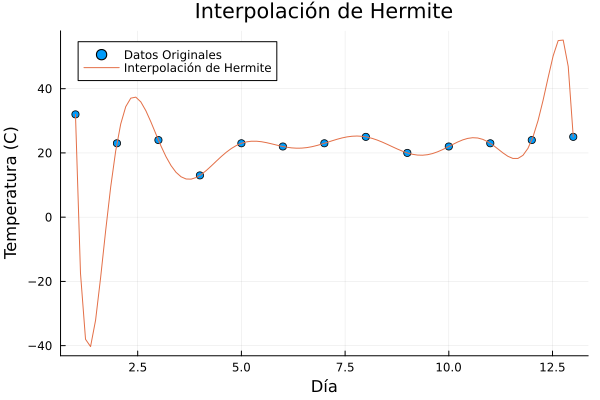

In [5]:
using Plots

function interpolaciónDeHermite(puntosX, valoresEnPuntosX, puntoAInterpolar)

    derivadasEnPuntosX = Float64[] # Inicializa un array vacío para las derivadas

    for i in 1:length(valoresEnPuntosX)-1
        derivada = (valoresEnPuntosX[i+1] - valoresEnPuntosX[i]) / (puntosX[i+1] - puntosX[i])
        push!(derivadasEnPuntosX, derivada) 
    end
    push!(derivadasEnPuntosX, derivadasEnPuntosX[end]) 

    # Inicializa los coeficientes de Hermite como flotantes
    coeficientesHermite = Float64.(valoresEnPuntosX)
    
    # Calcula los coeficientes de Hermite
    for i in 2:length(puntosX)
        for j in length(puntosX):-1:i
            numerador = coeficientesHermite[j] - coeficientesHermite[j-1]
            denominador = puntosX[j] - puntosX[j-i+1]
            coeficientesHermite[j] = numerador / denominador
        end
    end
    
    # Calcula la interpolación de Hermite
    aproximación = coeficientesHermite[end]
    for i in length(coeficientesHermite)-1:-1:1
        aproximación = aproximación * (puntoAInterpolar - puntosX[i]) + coeficientesHermite[i]
    end
    
    return aproximación
end

temperaturas = [32, 23, 24, 13, 23, 22, 23, 25, 20,22,23,24,25] 
días = collect(range(1, stop=length(temperaturas))) 


rangoX = range(1, stop=length(temperaturas), length=100)
rangoY = [interpolaciónDeHermite(días, temperaturas, x) for x in rangoX]
plot(días, temperaturas, seriestype=:scatter, label="Datos Originales", xlabel="Día", ylabel="Temperatura (C)",
     title="Interpolación de Hermite", legend=:topleft, grid=true)
plot!(rangoX, rangoY, label="Interpolación de Hermite")


